In [1]:
import nomic
import json
api_key_path = "/home/paperspace/api_keys.json"

with open(api_key_path, 'r') as j:
    login_key = json.loads(j.read())['nomic']
nomic.login(login_key)

#- Scientific programming
import numpy as np
import pandas as pd
from tqdm import tqdm

#- Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#- Data
from nomic import AtlasDataset
import pickle

dataset = AtlasDataset('hivemind/tweets-from-members-of-us-congress-from-all-time-updated-2024-07-12')
df = dataset.maps[0].data.df

# Specify the path to your .p file
file_path = "/home/paperspace/congressional-twin/models/predicted_topics.p"

with open(file_path, "rb") as file:
    id_to_topic_dict=pickle.load(file)
    
print(f'size of tweet data {len(df)}; size of label size {len(id_to_topic_dict)}')
df.head()

2024-07-15 22:52:26.946 | INFO     | nomic.dataset:__init__:761 - Loading existing dataset `hivemind/tweets-from-members-of-us-congress-from-all-time-updated-2024-07-12`.
2024-07-15 22:52:27.685 | WARNING  | nomic.data_operations:df:923 - Converting to pandas dataframe. This may materialize a large amount of data into memory.
2024-07-15 22:52:27.686 | INFO     | nomic.data_operations:_download_data:902 - Downloading data
100%|██████████████████████████████████████████████████████████████████████████████| 129/129 [00:00<00:00, 12468.38it/s]
2024-07-15 22:52:28.240 | INFO     | nomic.data_operations:_load_data:872 - Loading data
100%|████████████████████████████████████████████████████████████████████████████████| 129/129 [00:00<00:00, 191.97it/s]


size of tweet data 3130603; size of label size 3130948


,tweetId,postedAt,name,state,party,twitter_lower,chamber,years,source,text,id
0,1065633444502224896,2018-11-22 15:49:46.338,Ken Buck R-CO,CO,R,repkenbuck,House,2017_2018,PolitWoops,Happy #Thanksgiving! I hope everyone has a cha...,1203633
1,1479108462504136704,2022-01-06 15:11:52.624,Kat Cammack R-FL,FL,R,repkatcammack,House,2021_2022,PolitWoops,"RT @MorningsMaria: .@RepKatCammack: ""The Democ...",2857207
2,85108215381102592,2011-06-26 22:12:34.438,Dennis Ross R-FL,FL,R,repdennisross,House,2011_2012,PolitWoops,@CEP_Observer will have to check that out.,35353
3,925691081026621440,2017-11-01 11:48:46.882,Richard Hudson R-NC,NC,R,reprichhudson,House,2017_2018,PolitWoops,RT @BGClubCab: Thanks to @CharlotteWBB for hel...,954870
4,1435963943533568000,2021-09-09 13:50:57.715,Chip Roy R-TX,TX,R,repchiproy,House,2021_2022,PolitWoops,RT @chiproytx: No. https://t.co/STZW0DdDz1,2324693


In [2]:
topic_to_label = {'Government and Public Administration': "Gov't and Public Admin.",
 'National Security and Foreign Policy': "Foreign Policy",
 'Miscellaneous': "Miscellaneous",
 'Economic Affairs': "Econ. Affairs",
 'Science, Technology, and Natural Resources': "Science & Tech.",
 'Education': 'Education'
}

df['postedAtYear'] = df['postedAt'].dt.year
df['yearMonth'] = df['postedAt'].dt.to_period('M')
df['topic'] = df['id'].map(id_to_topic_dict)
df.head()

,tweetId,postedAt,name,state,party,twitter_lower,chamber,years,source,text,id,postedAtYear,yearMonth,topic
0,1065633444502224896,2018-11-22 15:49:46.338,Ken Buck R-CO,CO,R,repkenbuck,House,2017_2018,PolitWoops,Happy #Thanksgiving! I hope everyone has a cha...,1203633,2018,2018-11,National Security and Foreign Policy
1,1479108462504136704,2022-01-06 15:11:52.624,Kat Cammack R-FL,FL,R,repkatcammack,House,2021_2022,PolitWoops,"RT @MorningsMaria: .@RepKatCammack: ""The Democ...",2857207,2022,2022-01,National Security and Foreign Policy
2,85108215381102592,2011-06-26 22:12:34.438,Dennis Ross R-FL,FL,R,repdennisross,House,2011_2012,PolitWoops,@CEP_Observer will have to check that out.,35353,2011,2011-06,National Security and Foreign Policy
3,925691081026621440,2017-11-01 11:48:46.882,Richard Hudson R-NC,NC,R,reprichhudson,House,2017_2018,PolitWoops,RT @BGClubCab: Thanks to @CharlotteWBB for hel...,954870,2017,2017-11,Miscellaneous
4,1435963943533568000,2021-09-09 13:50:57.715,Chip Roy R-TX,TX,R,repchiproy,House,2021_2022,PolitWoops,RT @chiproytx: No. https://t.co/STZW0DdDz1,2324693,2021,2021-09,National Security and Foreign Policy


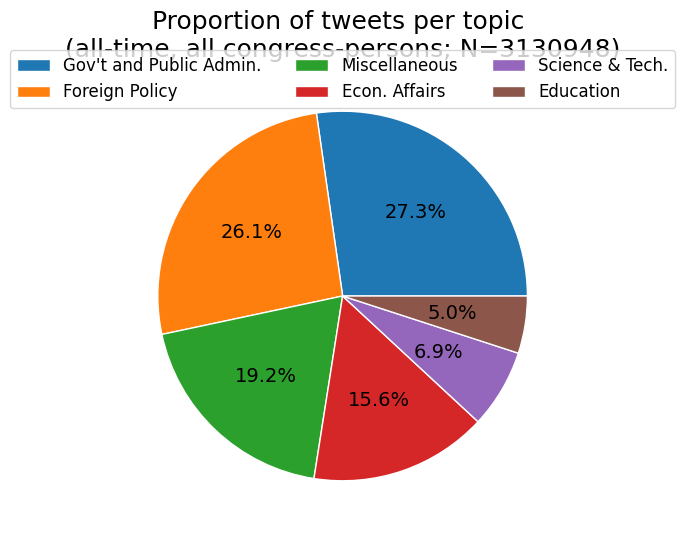

In [3]:
from collections import Counter
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize=(6,6))

topic_counts = Counter(id_to_topic_dict.values())

top_topics = topic_counts.most_common(6)
labels = [topic[0] for topic in top_topics]
counts = [topic[1] for topic in top_topics]

ax.pie(counts, autopct='%1.1f%%', wedgeprops = {'edgecolor': 'white', 'alpha': 1},textprops={'fontsize': 14})
ax.set_title(f'Proportion of tweets per topic \n(all-time, all congress-persons; N={len(id_to_topic_dict)})', fontsize=18)

ax.legend(list(topic_to_label.values()), loc='upper center', ncols=3, bbox_to_anchor=(0.5, 1.05), fontsize=12)

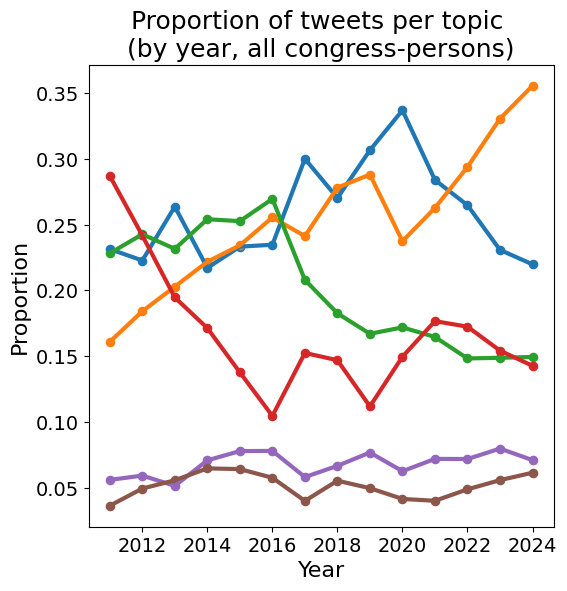

In [4]:
num_tweets_per_topic_per_year = df.groupby(['topic', 'postedAtYear']).size().reset_index(name='tweets_count')
tweets_per_topic_year_pivot = num_tweets_per_topic_per_year.pivot(index='topic', columns='postedAtYear', values='tweets_count')

fil = tweets_per_topic_year_pivot[tweets_per_topic_year_pivot.index.isin(labels)]
fil_proportion = fil.div(fil.sum())

year=fil.columns

fig, ax = plt.subplots(1,1, figsize=(6,6))
for (key, value) in topic_to_label.items():
    ax.plot(year, fil_proportion.loc[key], label=value, lw=3)
    
for (key, value) in topic_to_label.items():
    ax.scatter(year, fil_proportion.loc[key], label=value, s=35)
    
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Proportion', fontsize=16)
ax.set_title('Proportion of tweets per topic \n(by year, all congress-persons)', fontsize=18)

ax.set_xticks(year[1::2], labels=year.values.astype(str)[1::2])

ax.tick_params(labelsize=14)

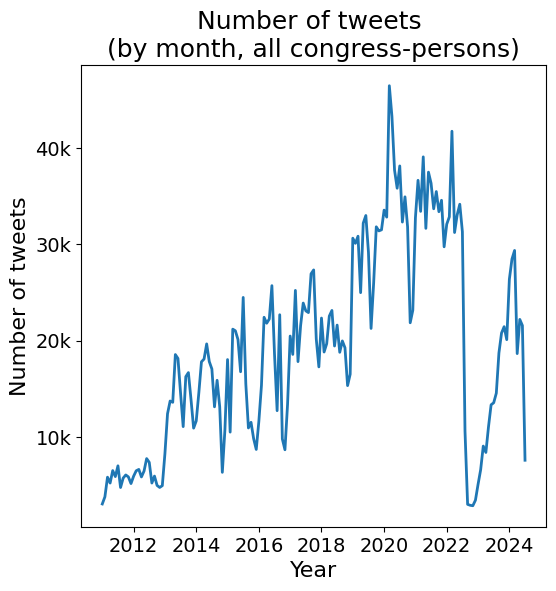

In [5]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
num=df['yearMonth'].value_counts().sort_index()
ax.plot(range(len(num.index)), num.values, lw=2)
ax.set_xticks(np.arange(len(num.index))[12::24], [str(s).split('-')[0] for s in num.index][12::24])
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Number of tweets', fontsize=16)

ax.set_yticks([i*10000 for i in range(1,5)], [f'{i*10}k' for i in range(1,5)])
ax.set_title('Number of tweets \n(by month, all congress-persons)', fontsize=18)

ax.tick_params(labelsize=14)

In [6]:
data_num = df.drop('text', axis=1) ## drop the text column
num_tweets_per_cp_per_year = data_num.groupby(['name', 'postedAtYear']).size().reset_index(name='tweets_count')
tweets_per_cp_year_pivot = num_tweets_per_cp_per_year.pivot(index='name', columns='postedAtYear', values='tweets_count')

congress_info= df.iloc[:, [2,3,4,6]].drop_duplicates()

merged_df = pd.merge(congress_info, tweets_per_cp_year_pivot, on='name')
merged_df.head()

/tmp/ipykernel_26849/846027897.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_tweets_per_cp_per_year = data_num.groupby(['name', 'postedAtYear']).size().reset_index(name='tweets_count')


,name,state,party,chamber,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Ken Buck R-CO,CO,R,House,0,0,0,0,516,414,178,180,234,0,0,0,0,0
1,Kat Cammack R-FL,FL,R,House,0,0,0,0,0,0,0,0,0,0,2266,1071,0,0
2,Dennis Ross R-FL,FL,R,House,3773,3206,774,783,347,368,527,97,0,0,0,0,0,0
3,Richard Hudson R-NC,NC,R,House,0,0,1043,924,657,711,751,804,750,640,622,267,0,0
4,Chip Roy R-TX,TX,R,House,0,0,0,0,0,0,0,0,1723,1149,1930,1850,0,0


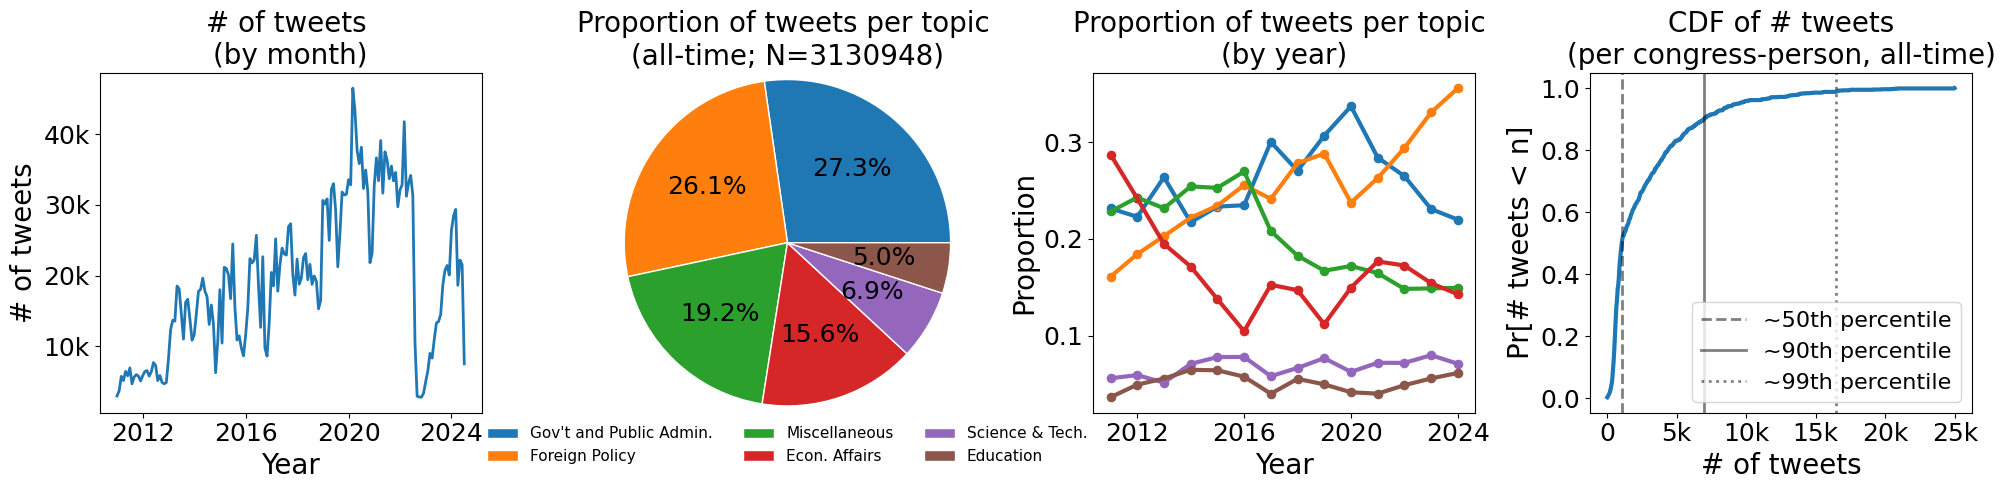

In [7]:
fig, axs = plt.subplots(1,4, figsize=(20, 5))

ticksize=18
axlabelsize=20
titlesize=20

yearstart=1
yearskip=4

#- 1b
ax=axs[1]

ax.pie(counts, autopct='%1.1f%%', 
       radius=1.2,
       wedgeprops = {'edgecolor': 'white', 'alpha': 1},
       textprops={'fontsize': ticksize})
ax.set_title(f'Proportion of tweets per topic \n(all-time; N={len(id_to_topic_dict)})', fontsize=titlesize)

# ax.legend(list(topic_to_label.values()), loc='upper center', ncols=3, bbox_to_anchor=(0.5, 1.05), fontsize=12)

#- 1c
ax=axs[2]
year=fil.columns

for (key, value) in topic_to_label.items():
    ax.plot(year, fil_proportion.loc[key], label=value, lw=3)
    
for (key, value) in topic_to_label.items():
    ax.scatter(year, fil_proportion.loc[key], label=value, s=35)
    
ax.set_xlabel('Year', fontsize=axlabelsize)
ax.set_ylabel('Proportion', fontsize=axlabelsize)
ax.set_title('Proportion of tweets per topic \n(by year)', fontsize=titlesize)

ax.set_xticks(year[yearstart::yearskip], labels=year.values.astype(str)[yearstart::yearskip])
ax.tick_params(labelsize=ticksize)


#- 1a
num=df['yearMonth'].value_counts().sort_index()

ax=axs[0]
ax.plot(range(len(num.index)), num.values, lw=2)
ax.set_xticks(np.arange(len(num.index))[yearstart*12::yearskip*12], [str(s).split('-')[0] for s in num.index][yearstart*12::yearskip*12])
ax.set_xlabel('Year', fontsize=axlabelsize)
ax.set_ylabel('# of tweets', fontsize=axlabelsize)

ax.set_yticks([i*10000 for i in range(1,5)], [f'{i*10}k' for i in range(1,5)])
ax.set_title('# of tweets \n(by month)', fontsize=titlesize)

ax.tick_params(labelsize=ticksize)

#- 1d
merged_df['sum'] = merged_df.loc[:, 2011:2024].sum(axis=1)
values = merged_df.loc[:, 'sum']
hist, bin_edges = np.histogram(values, bins=1000, density=False)
cdf = np.cumsum(hist)

ax = axs[3]
ax.plot(bin_edges[1:], cdf / cdf[-1], lw=3)
ax.set_title('CDF of # tweets\n(per congress-person, all-time)', fontsize=titlesize)
ax.set_xlabel('# of tweets', fontsize=axlabelsize)
ax.set_ylabel(r'Pr[# tweets < n]', fontsize=axlabelsize)

ax.set_xticks([0, 5000, 10000, 15000, 20000, 25000], ['0', '5k', '10k', '15k', '20k', '25k'])
ax.tick_params(labelsize=ticksize)

ax.axvline(x=bin_edges[1:][np.argmin(abs((cdf / cdf[-1]) - 0.5))], c='k', alpha=0.5, ls='--', label='~50th percentile', lw=2)
ax.axvline(x=bin_edges[1:][np.argmin(abs((cdf / cdf[-1]) - 0.9))], c='k', alpha=0.5, ls='-', label='~90th percentile',lw=2)
ax.axvline(x=bin_edges[1:][np.argmin(abs((cdf / cdf[-1]) - 0.99))], c='k', alpha=0.5, ls=':', label='~99th percentile', lw=2)
ax.legend(fontsize=ticksize-2, loc='lower right')
plt.tight_layout()

ax=axs[1]
ax.legend(list(topic_to_label.values()), loc='upper center', ncols=3, bbox_to_anchor=(0.5, 0), fontsize=11, frameon=False)